# Tutorial Sequence
https://www.cheminformania.com/scikit-mol-easy-embedding-of-rdkit-into-scikit-learn/

## Import / Configure a Transformer

In [5]:
from scikit_mol.fingerprints import RDKitFingerprintTransformer
transformer = RDKitFingerprintTransformer(maxPath=5) # initialize RDKit Fingerprint Transformer
print(transformer) # only displayed non-default settings

RDKitFingerprintTransformer(maxPath=5)


In [6]:
transformer # displays settings in HTML widget

RDKitFingerprintTransformer(maxPath=5)

In [7]:
parameters = transformer.get_params() # dictionary of the settings available
parameters

{'branchedPaths': True,
 'countBounds': None,
 'countSimulation': False,
 'fpSize': 2048,
 'maxPath': 5,
 'minPath': 1,
 'n_jobs': None,
 'numBitsPerFeature': 2,
 'safe_inference_mode': False,
 'useBondOrder': True,
 'useCounts': False,
 'useHs': True}

In [8]:
parameters["maxPath"] = 4 # parameters dictionary allows external setting of settings values
transformer.set_params(**parameters)
print(transformer)

RDKitFingerprintTransformer(maxPath=4)


## Create Molecule List

In [14]:
from rdkit import Chem
smiles_strings = ["c1ccccc1", "Cc1ccncc1CCCN", "Cc1ccncc1CN"]
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_strings]

## Transform Molecule List to Fingerprints

In [17]:
fps = transformer.transform(mols)
print(f"{fps.__class__=}")
print(f"{fps.shape=}")
fps

fps.__class__=<class 'numpy.ndarray'>
fps.shape=(3, 2048)


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]], dtype=uint8)

## Import rdkit Pandas Tools, sklearn functions, and scikit functions

In [20]:
import os
from rdkit.Chem import PandasTools
import pandas as pd
from sklearn.pipeline import make_pipeline, make_union
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scikit_mol.descriptors import MolecularDescriptorTransformer
from scikit_mol.conversions import SmilesToMolTransformer

## Download and Add Molecule Column to Data

0 out of 7228 SMILES failed in conversion


C:\Users\Eric\anaconda3\Lib\site-packages\rdkit\Chem\PandasPatcher.py:137: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  for col in df_subset.columns[df_subset.applymap(MolFormatter.is_mol).any()]


,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,SMILES,ROMol
0,AZMKBJHIXZCVNL-BXKDBHETNA-N,44590643,6532,A,5.68382,pubchem,393260,9606,SLC6A4,4061,FC1=CC([C@@H]2O[C@H](CC2)CN)=C(OC)C=C1,
1,AZMKBJHIXZCVNL-UHFFFAOYNA-N,11492305,6532,A,5.16210,pubchem,393258,9606,SLC6A4,4061,FC1=CC(C2OC(CC2)CN)=C(OC)C=C1,
2,AZOHUEDNMOIDOC-GETDIYNLNA-N,44419340,6532,A,6.66354,pubchem,276059,9606,SLC6A4,4061,FC1=CC=C(C[C@H]2C[C@@H](N(CC2)CC=C)CCCNC(=O)NC...,
3,AZSKJKSQZWHDOK-VJSLDGLSNA-N,CHEMBL1080745,6532,A,6.96000,chembl20,617082,9606,SLC6A4,4061,C=1C=C(C=CC1)C2=CC(=C(N2CC(C)C)C)C(NCCCN3CCN(C...,
4,AZTPZTRJVCAAMX-UHFFFAOYNA-N,CHEMBL578346,6532,A,8.00000,chembl20,596934,9606,SLC6A4,4061,C1=CC=C2C(=C1)C=C(C(N(C3CCNCC3)C4CCC4)=O)C=C2,
...,...,...,...,...,...,...,...,...,...,...,...,...
7223,ZZHKHRXDQLQSFW-HHHXNRCGNA-N,CHEMBL282380,6532,A,5.74000,chembl20,532580,9606,SLC6A4,4061,C=1C=CC(C(C=2C=CC=CC2)OCCN3CCN(CC3)C[C@@H](CC4...,
7224,ZZHKHRXDQLQSFW-MHZLTWQENA-N,CHEMBL28149,25553,A,5.67000,chembl20,198050,10116,SLC6A4,4061,C=1C=CC(C(C=2C=CC=CC2)OCCN3CCN(CC3)C[C@H](CC4=...,
7225,ZZHKHRXDQLQSFW-MHZLTWQENA-N,CHEMBL28149,6532,A,5.66000,chembl20,532580,9606,SLC6A4,4061,C=1C=CC(C(C=2C=CC=CC2)OCCN3CCN(CC3)C[C@H](CC4=...,
7226,ZZJGNQRWIXQQDJ-CPLJGATDNA-N,44419306,6532,A,5.26241,pubchem,276059,9606,SLC6A4,4061,FC1=CC=C(C[C@H]2C[C@@H](N(CC2)C(=O)C)CCCNC(=O)...,

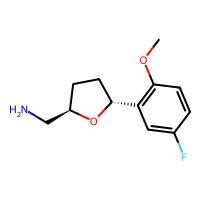
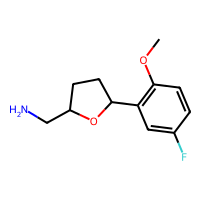
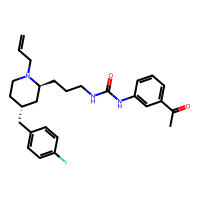
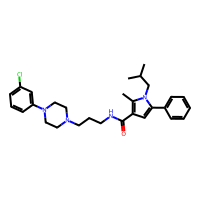
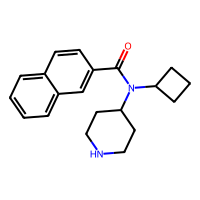
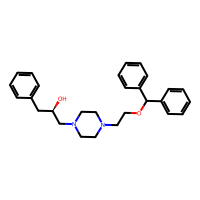
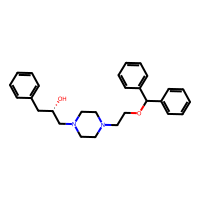
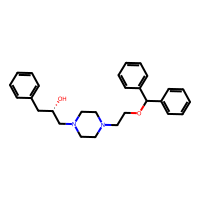
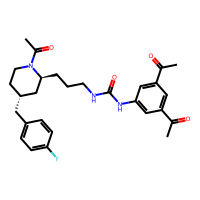
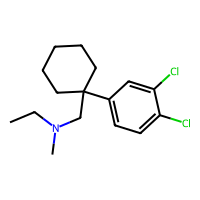

In [23]:
csv_file = "SLC6A4_active_excape_export.csv" # SLC6A4 activity data file name
if not os.path.exists(csv_file): # download if not present
    import urllib.request
    url = "https://ndownloader.figshare.com/files/25747817"
    urllib.request.urlretrieve(url, csv_file)
data = pd.read_csv(csv_file) # make pandas fram from data
PandasTools.AddMoleculeColumnToFrame(data, smilesCol="SMILES") # rdkit pandas tool to create molecule column
print(f"{data.ROMol.isna().sum()} out of {len(data)} SMILES failed in conversion")
data

## Split Off Test Set

In [26]:
mol_list_train, mol_list_test, y_train, y_test = train_test_split(data.ROMol, data.pXC50) # uses random splitting

## Create Model Pipeline

In [3]:
model = make_pipeline( make_union(
                                # RDKitFingerprintTransformer(maxPath=4), # use fingerprint transformer
                                make_pipeline(MolecularDescriptorTransformer(desc_list=["MolWt", "BalabanJ"]), # selected descriptors
                                              PolynomialFeatures(degree=2)), # captures polynomial relationships for descriptors
                                n_jobs=2),
                        Ridge(alpha=10) # applies strong regularization to prevent over-generalization
)

NameError: name 'make_pipeline' is not defined

In [64]:
# same as above, but broken down into parts
descriptor_calculator = MolecularDescriptorTransformer(desc_list=["MolWt", "BalabanJ"])
desc_pipeline = make_pipeline(descriptor_calculator,
                              PolynomialFeatures(degree=2))
fingerprinter = RDKitFingerprintTransformer(maxPath=4)
features_pipeline = make_union ( desc_pipeline, fingerprinter)
estimator = Ridge(alpha=10)
model = make_pipeline ( features_pipeline, estimator)

In [82]:
model.fit(transformer.transform(mol_list_train), transformer.transform(y_train))

C:\Users\Eric\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)
C:\Users\Eric\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\Eric\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\Eric\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\Eric\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\Eric\ana

ArgumentError: Python argument types in
    FingeprintGenerator64.GetFingerprintAsNumPy(FingeprintGenerator64, float)
did not match C++ signature:
    GetFingerprintAsNumPy(class RDKit::FingerprintGenerator<unsigned __int64> const * __ptr64 self, class RDKit::ROMol mol, class boost::python::api::object fromAtoms=[], class boost::python::api::object ignoreAtoms=[], int confId=-1, class boost::python::api::object customAtomInvariants=[], class boost::python::api::object customBondInvariants=[], class boost::python::api::object additionalOutput=None)

## Score Model

In [80]:
print(f"Test score is {model.score(mol_list_test, y_test)}")

Test score is 0.009242375674145875


## Add SMILES Transformer to Pipeline

In [ ]:
smiles_model = make_pipeline(SmilesToMolTransformer(), model) # pipeline including smiles
smiles_model

In [ ]:
smiles_model.predict(["c1ccccc1"]) # test prediction